In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 500)

In [2]:
train0 = pd.read_csv('train.csv')
train0.Transported = train0.Transported.map({False:0, True:1}).astype(int)
train0.VIP = train0.VIP.map({False:0, True:1})
train0.CryoSleep = train0.CryoSleep.map({False:0, True:1})

test0 = pd.read_csv('test.csv')
test0.VIP = test0.VIP.map({False:0, True:1})
test0.CryoSleep = test0.CryoSleep.map({False:0, True:1})

print(train0.shape)
print(test0.shape)

(8693, 14)
(4277, 13)


In [3]:
df0 = pd.concat([train0, test0], axis='rows')
df0 = df0.reset_index(drop=True)

print(df0.shape)
df0.head(3)

(12970, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0


In [4]:
df1 = df0.copy()

In [46]:
"""
    'PassengerId', splitted to groupid
    'HomePlanet',
    'CryoSleep',
    'Cabin', splitted to deck letter
    'Destination',
    'Age',
    'VIP',
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck',
    'Name', splitted to surname
    'Transported'
"""

"\n    'PassengerId', splitted to groupid\n    'HomePlanet',\n    'CryoSleep',\n    'Cabin', splitted to deck letter\n    'Destination',\n    'Age',\n    'VIP',\n    'RoomService',\n    'FoodCourt',\n    'ShoppingMall',\n    'Spa',\n    'VRDeck',\n    'Name', splitted to surname\n    'Transported'\n"

In [6]:
surname = df1.Name
surname = surname.str.split(' ').str[1]
df1['Surname'] = surname
df1 = df1.drop('Name', axis='columns')

In [7]:
cabin = df1.Cabin
cabin = cabin.str.split('/').str[0]
df1 = df1.drop('Cabin', axis='columns')
df1['Cabin'] = cabin

In [8]:
groupid = df1.PassengerId
groupid = groupid.str.split('_').str[0]
df1['GroupId'] = groupid

In [9]:
df1.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname,Cabin,GroupId
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ofracculy,B,0001
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Vines,F,0002
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,Susent,A,0003


In [10]:
# Same GroupId refers to same HomePlanet
df1[df1.GroupId == '8168']

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname,Cabin,GroupId
7653,8168_01,Earth,0.0,55 Cancri e,32.0,0.0,7.0,723.0,NaN,6.0,13.0,0.0,Carpentley,F,8168
7654,8168_02,Earth,0.0,TRAPPIST-1e,32.0,0.0,293.0,889.0,1.0,1.0,200.0,0.0,Boyers,F,8168
7655,8168_03,Earth,0.0,TRAPPIST-1e,21.0,0.0,644.0,0.0,0.0,0.0,2.0,0.0,Carpentley,F,8168
7656,8168_04,Earth,0.0,TRAPPIST-1e,NaN,0.0,4.0,0.0,9.0,20.0,831.0,0.0,Boyers,F,8168
7657,8168_05,Earth,0.0,TRAPPIST-1e,22.0,0.0,753.0,0.0,0.0,0.0,0.0,0.0,Carpentley,G,8168
7658,8168_06,Earth,0.0,TRAPPIST-1e,18.0,0.0,0.0,858.0,2.0,NaN,0.0,1.0,Carpentley,G,8168
7659,8168_07,Earth,1.0,PSO J318.5-22,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Boyers,G,8168
7660,8168_08,Earth,1.0,TRAPPIST-1e,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Boyers,G,8168


In [11]:
df1[df1.GroupId == '8956']

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname,Cabin,GroupId
8371,8956_01,Earth,0.0,TRAPPIST-1e,25.0,0.0,0.0,0.0,0.0,6.0,1989.0,0.0,Bonnondry,F,8956
8372,8956_02,Earth,1.0,NaN,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Bonnondry,G,8956
8373,8956_03,Earth,0.0,PSO J318.5-22,24.0,0.0,0.0,0.0,40.0,0.0,575.0,0.0,Bonnondry,G,8956
8374,8956_04,Earth,0.0,TRAPPIST-1e,NaN,0.0,194.0,1.0,10.0,629.0,0.0,0.0,Bonnondry,G,8956
8375,8956_05,Earth,1.0,TRAPPIST-1e,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bonnondry,G,8956
8376,8956_06,Earth,0.0,PSO J318.5-22,22.0,0.0,0.0,29.0,165.0,404.0,0.0,0.0,Bonnondry,F,8956
8377,8956_07,Earth,0.0,55 Cancri e,39.0,0.0,0.0,0.0,1291.0,224.0,0.0,0.0,Bonnondry,F,8956
8378,8956_08,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,0.0,0.0,741.0,0.0,Bonnondry,F,8956


In [12]:
df1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Surname', 'Cabin', 'GroupId'],
      dtype='object')

<AxesSubplot:>

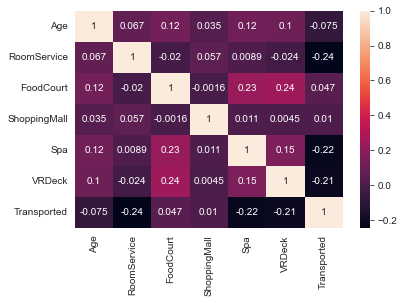

In [13]:
corr = df1[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
sns.heatmap(corr, annot=True)

In [14]:
df1.dtypes

PassengerId      object
HomePlanet       object
CryoSleep       float64
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported     float64
Surname          object
Cabin            object
GroupId          object
dtype: object

<AxesSubplot:xlabel='VIP'>

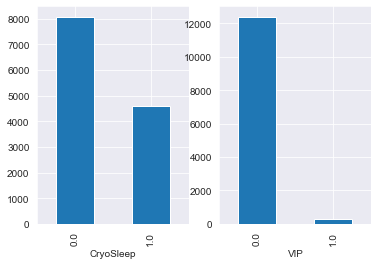

In [15]:
plt.subplot(1, 2, 1)
df1.groupby('CryoSleep').count().PassengerId.plot(kind='bar')
plt.subplot(1, 2, 2)
df1.groupby('VIP').count().PassengerId.plot(kind='bar')

In [16]:
df2 = df1.copy()

In [17]:
#['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

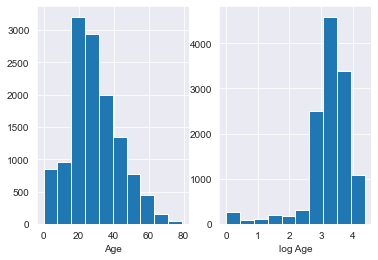

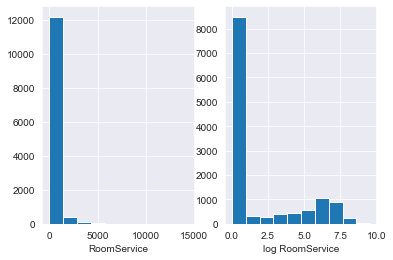

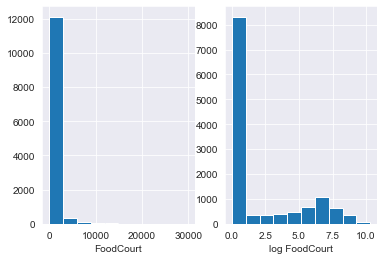

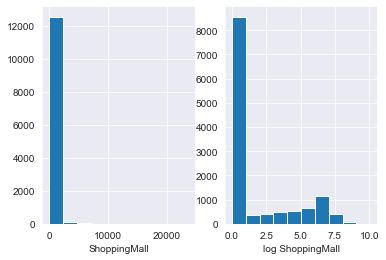

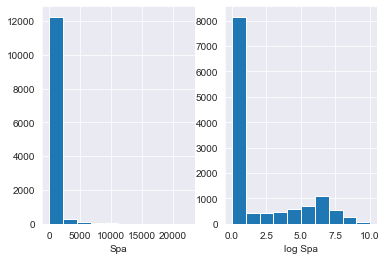

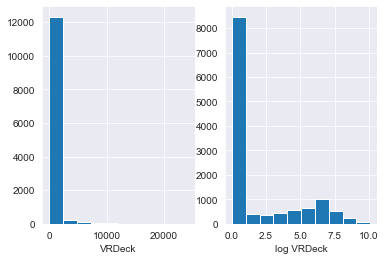

In [18]:
for column in ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    plt.subplot(1,2,1)
    plt.hist( df2[column ])
    plt.xlabel(column)
    plt.subplot(1,2,2)
    plt.hist( np.log1p(df2[column]) )
    plt.xlabel('log ' + column)
    plt.show()

In [19]:
df2.isna().sum() * 100 / df2.isna().count()

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Transported     32.976099
Surname          2.266769
Cabin            2.305320
GroupId          0.000000
dtype: float64

In [20]:
for id in df2.GroupId:
    if len( df2[df2.GroupId == id].dropna(axis='index')['HomePlanet'].unique() ) > 1:
        print( df2[df2.GroupId == id] )

In [21]:
#Before
(df2[df2.GroupId == '0119'])

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname,Cabin,GroupId
113,0119_01,NaN,0.0,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,0.0,Coning,A,0119
114,0119_02,Europa,1.0,TRAPPIST-1e,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Coning,A,0119


In [22]:
# Filling Planet based on Group Id
planet_df = df2[['GroupId', 'HomePlanet']].copy()
planet_df = planet_df.dropna(axis='index')
planet_df = planet_df.drop_duplicates(subset=['GroupId'], keep='first')
planet_map = dict(zip(planet_df["GroupId"], planet_df["HomePlanet"]))

df2["HomePlanet"] = df2["GroupId"].apply(lambda x: planet_map.get(x, np.nan))

In [23]:
#After
(df2[df2.GroupId == '0119'])

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname,Cabin,GroupId
113,0119_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,0.0,Coning,A,0119
114,0119_02,Europa,1.0,TRAPPIST-1e,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Coning,A,0119


In [24]:
df2.dtypes

PassengerId      object
HomePlanet       object
CryoSleep       float64
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported     float64
Surname          object
Cabin            object
GroupId          object
dtype: object

In [25]:
df2.isna().sum()

PassengerId        0
HomePlanet       157
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
Surname          294
Cabin            299
GroupId            0
dtype: int64

In [26]:
def fill_data(yourdata):
    
    df = pd.DataFrame()
    data = yourdata.copy()
    
    for column in data.select_dtypes('O').columns:
        df[column] = data[column].fillna(data[column].mode()[0])
    
    for column in data.select_dtypes(np.float64).columns:
        if column != 'Transported':
            if len(data[column].unique()) < 4: # For categorical variables (1, 0, NaN)
                df[column] = data[column].fillna(data[column].mode()[0])
            else:
                df[column] = data[column].fillna(data[column].median())
    df['Transported'] = data['Transported']  
    return df

In [27]:
df3 = fill_data(df2)
df3.isna().sum()

PassengerId        0
HomePlanet         0
Destination        0
Surname            0
Cabin              0
GroupId            0
CryoSleep          0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
dtype: int64

In [28]:
df3.head()

,PassengerId,HomePlanet,Destination,Surname,Cabin,GroupId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,TRAPPIST-1e,Ofracculy,B,0001,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,TRAPPIST-1e,Vines,F,0002,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,0003_01,Europa,TRAPPIST-1e,Susent,A,0003,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0003_02,Europa,TRAPPIST-1e,Susent,A,0003,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0004_01,Earth,TRAPPIST-1e,Santantines,F,0004,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df4 = df3.drop(['PassengerId', 'GroupId', 'Surname'], axis='columns').copy()

In [30]:
for column in df4.select_dtypes('O'):
    df4[column] = encoder.fit_transform(df4[column])

In [31]:
df4

,HomePlanet,Destination,Cabin,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,2,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,5,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1,2,0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1,2,0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0,2,5,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,2,6,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
12966,0,2,5,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN
12967,2,0,3,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
12968,1,2,3,0.0,27.0,0.0,0.0,2680.0,0.0,0.0,523.0,NaN


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df4[column] = scaler.fit_transform(df4[[column]])

In [33]:
train1 = df4[0:8693]
test1 = df4[8693:]
test1 = test1.drop('Transported', axis='columns')

X=train1.drop('Transported', axis='columns')
y=train1.Transported

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
models = [SVC(), RandomForestClassifier(), LogisticRegression(max_iter=1000), GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), GradientBoostingClassifier(), MLPClassifier(max_iter=1000)]

In [36]:
scores = []
for model in models:
    scores.append({
        model : cross_val_score(model, X, y, cv=5).mean()
    })
scores

[{SVC(): 0.7213871707811919},
 {RandomForestClassifier(): 0.7867265620295515},
 {LogisticRegression(max_iter=1000): 0.7598083895417588},
 {GaussianNB(): 0.7017162622064318},
 {MultinomialNB(): 0.7267931717433468},
 {DecisionTreeClassifier(): 0.7409411517141116},
 {GradientBoostingClassifier(): 0.7929392115225673},
 {MLPClassifier(max_iter=1000): 0.7950098961679893}]

In [37]:
nn = MLPClassifier(max_iter=1000)
nn.fit(X, y)
nn.predict(test1)

array([1., 0., 1., ..., 1., 1., 1.])

In [45]:
submission = pd.DataFrame()
submission['PassengerId'] = test0.PassengerId
submission['Transported'] = nn.predict(test1)
sum_mapping = {1:'True', 0:'False'}
submission['Transported'] = submission['Transported'].map(sum_mapping)
submission.to_csv('submission.csv', index=False)